In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn import linear_model
import numpy as np
%matplotlib inline

sales = pd.read_csv('home_data.csv')

In [90]:
sales.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


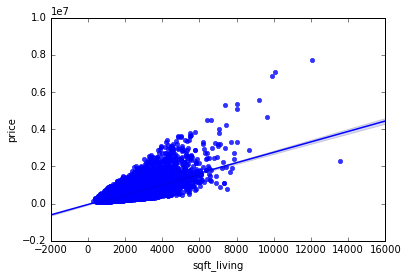

In [91]:
sns.regplot(x="sqft_living",y="price",data=sales)

In [92]:
len(sales)

21613

In [93]:
train_data= sales.sample(frac=0.8)
len(train_data)


17290

In [94]:
test_data,train_data= train_test_split(sales,test_size=0.8, random_state= 42)

reg_one_feature = linear_model.LinearRegression()
train_data_features = train_data['sqft_living'].values

train_data_targets = train_data['price'].values
train_data.sqft_living.shape

(17291,)

In [95]:
training_data_features= np.array([train_data.sqft_living]).T
training_data_features.shape

(17291, 1)

In [96]:
training_data_targets= np.array([train_data.price]).T
reg_one_feature.fit(training_data_features,training_data_targets)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [97]:
reg_one_feature.coef_

array([[ 285.46625209]])

In [98]:
test_data_features = np.array([test_data.sqft_living]).T
test_data_targets = np.array([test_data.price]).T

reg_one_feature.score(test_data_features,test_data_targets)

0.48194026314776439

In [99]:
test_data_targets.mean()

537485.24132346141

In [100]:
import math
math.sqrt(np.mean((reg_one_feature.predict(test_data_features)-test_data_targets) ** 2))

245633.80127667144

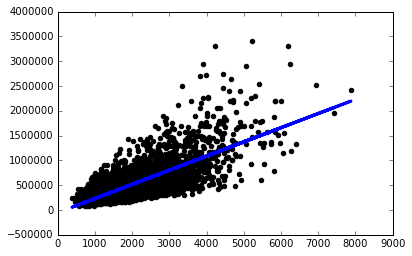

In [101]:
plt.scatter(test_data_features, test_data_targets, color='black')
plt.plot(test_data_features, reg_one_feature.predict(test_data_features), color='blue', linewidth=3)

In [102]:
from sklearn.metrics import mean_squared_error , explained_variance_score, mean_absolute_error, median_absolute_error
mean_squared_error(test_data_targets,reg_one_feature.predict(test_data_features))

60335964329.627319

In [103]:
explained_variance_score(test_data_targets,reg_one_feature.predict(test_data_features))

0.48194814033845457

In [104]:
mean_absolute_error(test_data_targets,reg_one_feature.predict(test_data_features))

174470.84809298132

In [105]:
median_absolute_error(test_data_targets, reg_one_feature.predict(test_data_features))

131779.33831602044

In [106]:
## Now training data with more features

In [107]:
training_date_more_features= train_data[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','zipcode']].values
training_date_more_features[0]

array([  4.00000000e+00,   2.25000000e+00,   2.07000000e+03,
         8.89300000e+03,   2.00000000e+00,   9.80580000e+04])

In [108]:
training_date_more_features.shape

(17291, 6)

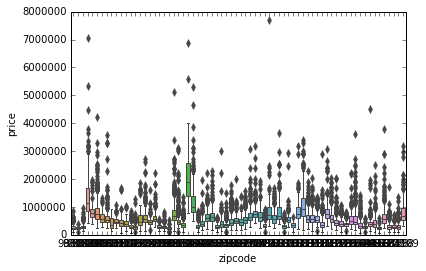

In [109]:
plot= sns.boxplot(x="zipcode",y="price",data=sales)

In [110]:
reg_many_feature= linear_model.LinearRegression()
reg_many_feature.fit(training_date_more_features,train_data_targets)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [111]:
test_data_many_features = test_data[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','zipcode']].values
mean_squared_error(test_data_targets,reg_many_feature.predict(test_data_many_features))

57734871610.536377

In [112]:
explained_variance_score(test_data_targets,reg_many_feature.predict(test_data_many_features))

0.504277267424037

In [113]:
mean_absolute_error(test_data_targets,reg_many_feature.predict(test_data_many_features))

167971.64893498126

In [114]:
median_absolute_error(test_data_targets,reg_many_feature.predict(test_data_many_features))

123288.06139751151

In [115]:
house1 = sales.loc[sales['id'] == 5309101200]

In [116]:
house1.price.values

array([620000])

In [117]:
house_one_feature = house1[['sqft_living']].values
house_many_features = house1[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','zipcode']].values

In [118]:
reg_one_feature.predict(house_one_feature)

array([[ 631657.50189037]])

In [119]:
reg_many_feature.predict(house_many_features)

array([ 634705.31641816])

In [120]:
house2= sales.loc[sales['id']== 1925069082]

In [121]:
house2.price.values

array([2200000])

In [122]:
house_one_feature = house2[['sqft_living']].values
house_many_features = house2[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','zipcode']].values

In [123]:
reg_one_feature.predict(house_one_feature)

array([[ 1271101.90657726]])

In [124]:
reg_many_feature.predict(house_many_features)

array([ 1273902.48524429])

In [125]:
bill_gates = {'bedrooms':[8], 
              'bathrooms':[25], 
              'sqft_living':[50000], 
              'sqft_lot':[225000],
              'floors':[4], 
              'zipcode':['98039'], 
              'condition':[10], 
              'grade':[10],
              'waterfront':[1],
              'view':[4],
              'sqft_above':[37500],
              'sqft_basement':[12500],
              'yr_built':[1994],
              'yr_renovated':[2010],
              'lat':[47.627606],
              'long':[-122.242054],
              'sqft_living15':[5000],
              'sqft_lot15':[40000]}

In [126]:
house3 = pd.DataFrame(data=bill_gates)

In [130]:
house3_one_feature= house3[['sqft_living']].values
house3_many_features = house3[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']].values

In [131]:
reg_many_feature.predict(house3_many_features)

array([ 15861206.91985363])

In [132]:
reg_one_feature.predict(house3_one_feature)

array([[ 14219851.10148672]])